# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.156550e+01     1.313015e+01
 * time: 0.0038928985595703125
     1     6.036446e+01     1.066067e+01
 * time: 0.09619379043579102
     2     5.453281e+01     1.510514e+01
 * time: 0.11364483833312988
     3     3.975778e+01     1.066023e+01
 * time: 0.13679289817810059
     4     3.147791e+01     9.528112e+00
 * time: 0.1585848331451416
     5     1.253510e+01     2.648760e+00
 * time: 0.17979097366333008
     6     9.136397e+00     2.712414e+00
 * time: 0.19858193397521973
     7     7.906068e+00     1.553455e+00
 * time: 0.21626996994018555
     8     7.179806e+00     3.295394e+00
 * time: 0.23125481605529785
     9     6.747893e+00     1.466729e+00
 * time: 0.30291295051574707
    10     6.358677e+00     1.831079e+00
 * time: 0.31669187545776367
    11     6.104113e+00     1.671170e+00
 * time: 0.33043694496154785
    12     6.076076e+00     2.580384e+00
 * time: 0.3402838706970215
    13     6.026766e+00     1.434365e+00
 * time:

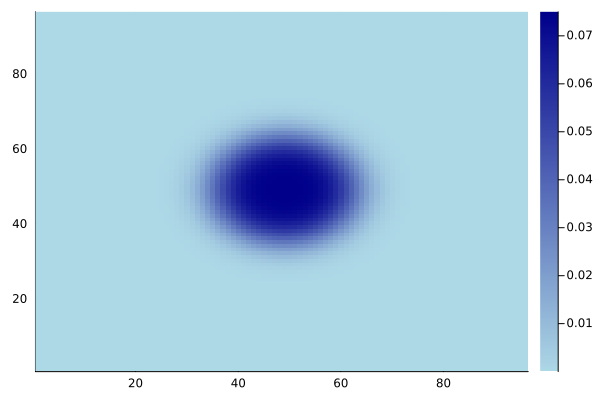

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)